# Importing all the necessary libraries

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Data Preprocessing

In [50]:
df = pd.read_csv("Electric Vehicle Sales by State in India.csv")

In [51]:
df.head(7)

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0
5,2014.0,jan,1/1/2014,Andhra Pradesh,CASH VAN,Others,Others,0.0
6,2014.0,jan,1/1/2014,Andhra Pradesh,CRANE MOUNTED VEHICLE,Others,Others,0.0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  float64
 1   Month_Name         96845 non-null  object 
 2   Date               96845 non-null  object 
 3   State              96845 non-null  object 
 4   Vehicle_Class      96845 non-null  object 
 5   Vehicle_Category   96845 non-null  object 
 6   Vehicle_Type       96845 non-null  object 
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(2), object(6)
memory usage: 5.9+ MB


In [53]:
df.shape

(96845, 8)

In [54]:
df.isnull().sum()

Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64

<Axes: >

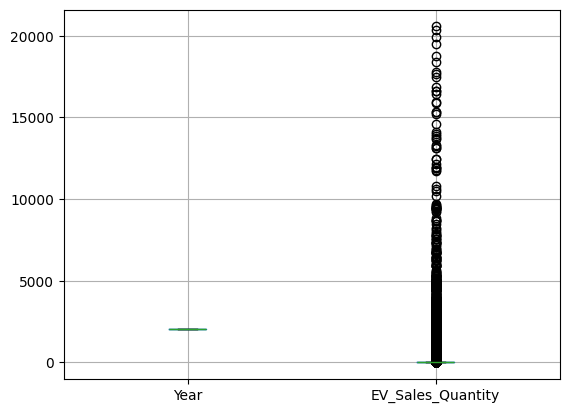

In [55]:
df.boxplot()

In [56]:
df['EV_Sales_Quantity'].value_counts()

EV_Sales_Quantity
0.0       82783
1.0        2481
2.0        1138
3.0         775
4.0         549
          ...  
1367.0        1
3538.0        1
1076.0        1
4579.0        1
921.0         1
Name: count, Length: 1447, dtype: int64

In [57]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

In [58]:
df.dropna(inplace=True)

In [59]:
df["Month_Num"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day

In [60]:
label_cols = ["State", "Vehicle_Class", "Vehicle_Category", "Vehicle_Type", "Month_Name"]
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

# Model Building

In [61]:
X = df[["Year", "Month_Num", "State", "Vehicle_Class", "Vehicle_Category", "Vehicle_Type"]]
y = df["EV_Sales_Quantity"]

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [64]:
y_pred = model.predict(X_test)

In [65]:
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R2 Score: 0.9320178278752649
RMSE: 133.05266292574527


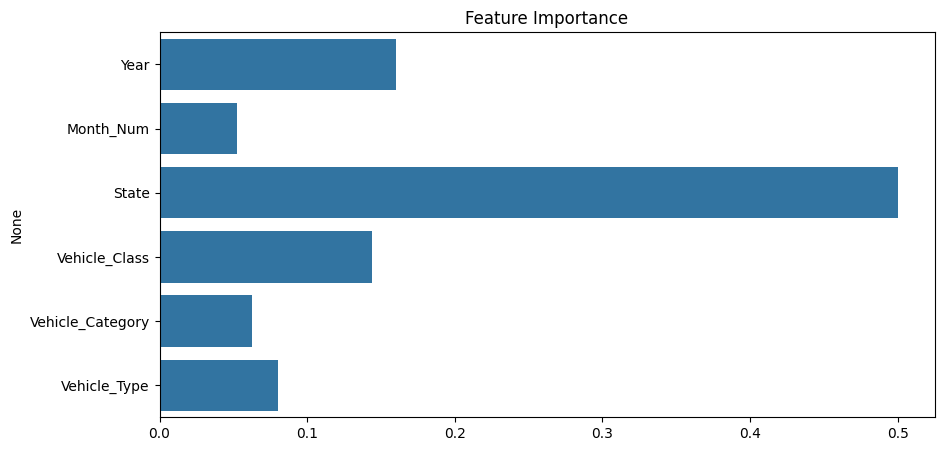

In [66]:
importances = model.feature_importances_
feat_names = X.columns
plt.figure(figsize=(10, 5))
sns.barplot(x=importances, y=feat_names)
plt.title("Feature Importance")
plt.show()